<a href="https://colab.research.google.com/github/Sindhujaudayasurriyan/BLOOD_CELL_COUNT_DETECTION/blob/main/segmentBCCD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q roboflow
!pip install -q ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.8/85.8 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 20.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 77.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 24.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 106.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 93.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 58.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 873.1 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 21.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/1

In [ ]:
!wget -q https://github.com/ultralytics/assets/releases/download/v0.0.0/yolov8n-seg.pt

In [ ]:
from roboflow import Roboflow
rf = Roboflow(api_key="L3WGChyIcs9ntkXOKr5T")
project = rf.workspace("atri-gly8b").project("cell-p3pcx")
version = project.version(1)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to cell-1 in yolov8:: 100%|██████████| 680/680 [00:00<00:00, 2765.12it/s]


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
!yolo task=segment mode=train epochs=25 batch=32 plots=True \
model="yolov8n-seg.pt" \
data="{dataset.location}/data.yaml"

Ultralytics 8.3.146 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=32, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/cell-1/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=25, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n-seg.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretraine


Final Validation Metrics:
Box Precision: 0.9307
Box Recall: 0.9598
Box mAP50: 0.9533
Box mAP50-95: 0.7442
Mask Precision: 0.9307
Mask Recall: 0.9598
Mask mAP50: 0.9533
Mask mAP50-95: 0.7265
Box Loss (val): 0.6997
Segmentation Loss (val): 0.9990
Class Loss (val): 0.5304
DFL Loss (val): 0.9543


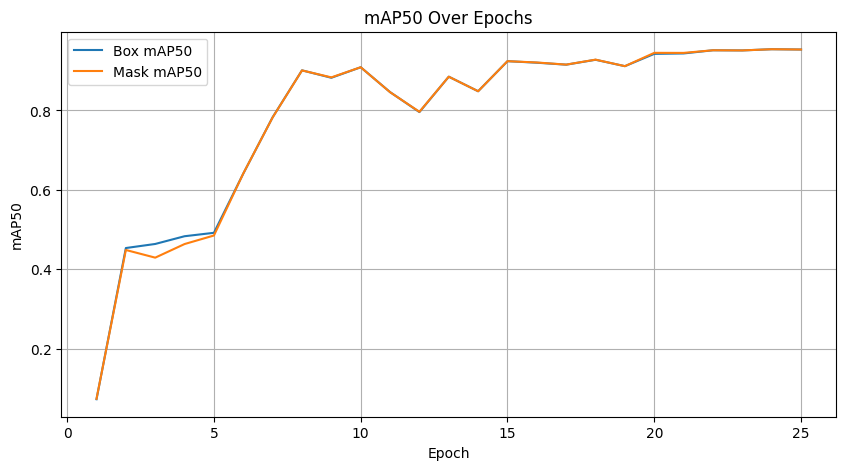

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os


results_csv = "/content/runs/segment/train/results.csv"
if os.path.exists(results_csv):
    df = pd.read_csv(results_csv)


    df.columns = df.columns.str.strip()


    final_metrics = df.iloc[-1]


    metrics_to_show = {
        'Box Precision': final_metrics['metrics/precision(B)'],
        'Box Recall': final_metrics['metrics/recall(B)'],
        'Box mAP50': final_metrics['metrics/mAP50(B)'],
        'Box mAP50-95': final_metrics['metrics/mAP50-95(B)'],
        'Mask Precision': final_metrics['metrics/precision(M)'],
        'Mask Recall': final_metrics['metrics/recall(M)'],
        'Mask mAP50': final_metrics['metrics/mAP50(M)'],
        'Mask mAP50-95': final_metrics['metrics/mAP50-95(M)'],
        'Box Loss (val)': final_metrics['val/box_loss'],
        'Segmentation Loss (val)': final_metrics['val/seg_loss'],
        'Class Loss (val)': final_metrics['val/cls_loss'],
        'DFL Loss (val)': final_metrics['val/dfl_loss']
    }

    print("\nFinal Validation Metrics:")
    for metric, value in metrics_to_show.items():
        print(f"{metric}: {value:.4f}")


    plt.figure(figsize=(10, 5))
    plt.plot(df['epoch'], df['metrics/mAP50(B)'], label='Box mAP50')
    plt.plot(df['epoch'], df['metrics/mAP50(M)'], label='Mask mAP50')
    plt.xlabel('Epoch')
    plt.ylabel('mAP50')
    plt.title('mAP50 Over Epochs')
    plt.legend()
    plt.grid()
    plt.show()
else:
    print("Results CSV not found. Check if training completed successfully.")

In [ ]:
from ultralytics import YOLO
model = YOLO("/content/runs/segment/train/weights/best.pt")
validation_results = model.val(data=f"{dataset.location}/data.yaml", imgsz=640, batch=32)


print("\nPer-Class Validation Metrics:")
for i, cls in enumerate(validation_results.names):
    print(f"Class: {cls}")
    print(f"  Box Precision: {validation_results.box.p[i]:.4f}")
    print(f"  Box Recall: {validation_results.box.r[i]:.4f}")
    print(f"  Box mAP50: {validation_results.box.ap50[i]:.4f}")
    print(f"  Box mAP50-95: {validation_results.box.ap[i]:.4f}")
    print(f"  Mask Precision: {validation_results.seg.p[i]:.4f}")
    print(f"  Mask Recall: {validation_results.seg.r[i]:.4f}")
    print(f"  Mask mAP50: {validation_results.seg.ap50[i]:.4f}")
    print(f"  Mask mAP50-95: {validation_results.seg.ap[i]:.4f}")

Ultralytics 8.3.146 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8n-seg summary (fused): 85 layers, 3,258,454 parameters, 0 gradients, 12.0 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1099.4±473.6 MB/s, size: 22.0 KB)


val: Scanning /content/cell-1/valid/labels.cache... 56 images, 1 backgrounds, 0 corrupt: 100%|██████████| 56/56 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   0%|          | 0/2 [00:00<?, ?it/s]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  50%|█████     | 1/2 [00:01<00:01,  1.03s/it]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.61s/it]


Ultralytics 8.3.143 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8n-seg summary (fused): 85 layers, 3,258,454 parameters, 0 gradients, 12.0 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 992.2±244.9 MB/s, size: 19.9 KB)


val: Scanning /content/cell-1/valid/labels.cache... 56 images, 1 backgrounds, 0 corrupt: 100%|██████████| 56/56 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.41s/it]


                   all         56        602       0.93      0.955      0.945       0.77       0.93      0.955      0.945      0.752
                     0         55        530      0.918      0.992      0.967      0.815      0.918      0.992      0.967      0.798
                     1         33         72      0.943      0.917      0.924      0.725      0.943      0.917      0.924      0.705
Speed: 5.6ms preprocess, 6.2ms inference, 0.0ms loss, 3.0ms postprocess per image
Results saved to runs/segment/val2

Class: 0
True Positives (TP): 526.0
False Positives (FP): 47.0
False Negatives (FN): 4.0
True Negatives (TN): 73.0
Confusion matrix heatmap for 0 saved to /content/runs/segment/train/confusion_matrix_0.png


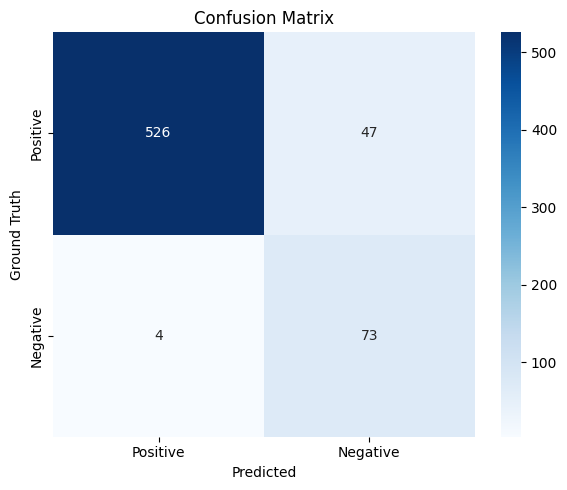


Class: 1
True Positives (TP): 66.0
False Positives (FP): 4.0
False Negatives (FN): 6.0
True Negatives (TN): 574.0
Confusion matrix heatmap for 1 saved to /content/runs/segment/train/confusion_matrix_1.png


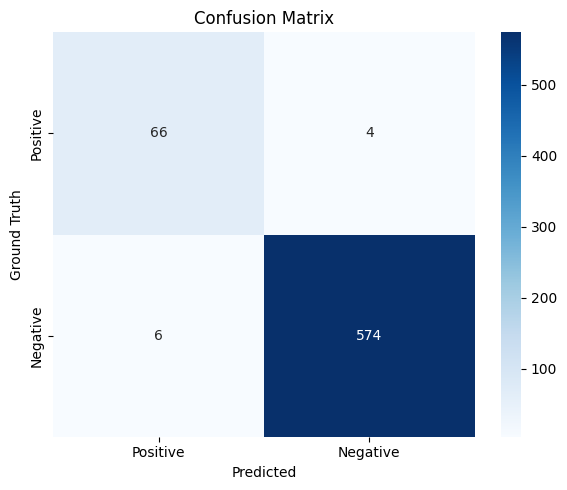


Class: Background
True Positives (TP): 0.0
False Positives (FP): 7.0
False Negatives (FN): 48.0
True Negatives (TN): 595.0
Confusion matrix heatmap for Background saved to /content/runs/segment/train/confusion_matrix_Background.png


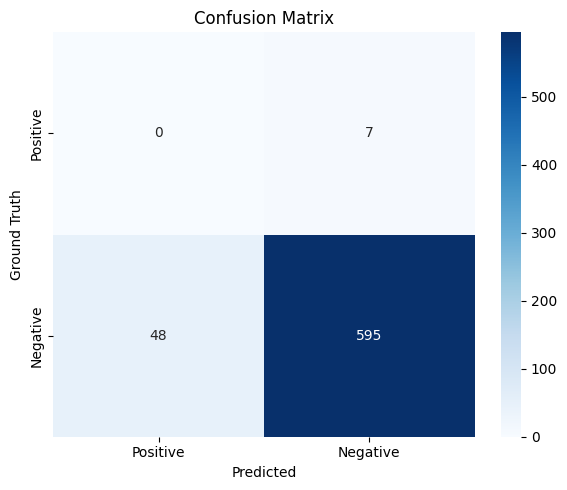

In [ ]:

!pip install -q seaborn
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from ultralytics import YOLO
import os


model = YOLO("/content/runs/segment/train/weights/best.pt")

validation_results = model.val(data=f"{dataset.location}/data.yaml", imgsz=640, batch=32, conf=0.25)


cm = validation_results.confusion_matrix.matrix


class_names = list(validation_results.names.values()) + ['Background']
num_classes = len(class_names)

# For each class, compute a 2x2 confusion matrix (Class vs. Non-Class)
for i, cls in enumerate(class_names):
    # Initialize 2x2 matrix: [[TP, FP], [FN, TN]] (swapped FP and FN positions)
    binary_cm = np.zeros((2, 2))


    binary_cm[0, 0] = cm[i, i]


    binary_cm[0, 1] = cm[i, :].sum() - cm[i, i]


    binary_cm[1, 0] = cm[:, i].sum() - cm[i, i]


    binary_cm[1, 1] = cm.sum() - (cm[i, :].sum() + cm[:, i].sum() - cm[i, i])


    print(f"\nClass: {cls}")
    print(f"True Positives (TP): {binary_cm[0, 0]}")
    print(f"False Positives (FP): {binary_cm[0, 1]}")
    print(f"False Negatives (FN): {binary_cm[1, 0]}")
    print(f"True Negatives (TN): {binary_cm[1, 1]}")

    plt.figure(figsize=(6, 5))
    sns.heatmap(binary_cm, annot=True, fmt='.0f', cmap='Blues',
                xticklabels=['Positive', 'Negative'],
                yticklabels=['Positive', 'Negative'])
    plt.title(f'Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Ground Truth')
    plt.tight_layout()


    output_path = f"/content/runs/segment/train/confusion_matrix_{cls}.png"
    plt.savefig(output_path)
    print(f"Confusion matrix heatmap for {cls} saved to {output_path}")

    plt.show()


Confusion Matrix for YOLOv8n-seg 
Rows: Ground Truth ['RBC', 'WBC']
Columns: Predicted ['RBC', 'WBC']
[[    0.99433   0.0056711]
 [          0           1]]
Confusion matrix heatmap saved to /content/runs/segment/train/confusion_matrix_yolov8n_seg_no_bg_platelets.png


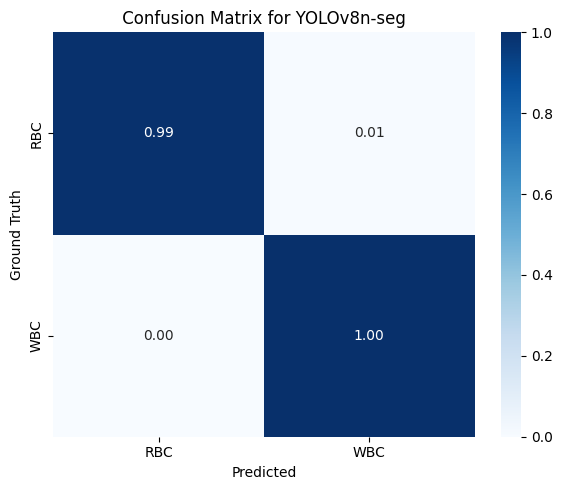


Overall TN, FP, FN, TP Metrics for YOLOv8n-seg :
True Negatives (TN): -3.0
False Positives (FP): 3.0
False Negatives (FN): 3.0
True Positives (TP): 592.0


In [ ]:

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


cm = validation_results.confusion_matrix.matrix


class_names = ['RBC', 'WBC']
included_indices = [0, 1]


cm_no_bg_platelets = cm[included_indices, :][:, included_indices]


cm_normalized = cm_no_bg_platelets / cm_no_bg_platelets.sum(axis=1, keepdims=True)
cm_normalized = np.nan_to_num(cm_normalized)

print("\nConfusion Matrix for YOLOv8n-seg ")
print(f"Rows: Ground Truth {class_names}")
print(f"Columns: Predicted {class_names}")
print(cm_normalized)


plt.figure(figsize=(6, 5))
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title(' Confusion Matrix for YOLOv8n-seg ')
plt.xlabel('Predicted')
plt.ylabel('Ground Truth')
plt.tight_layout()


output_path = "/content/runs/segment/train/confusion_matrix_yolov8n_seg_no_bg_platelets.png"
plt.savefig(output_path)
print(f"Confusion matrix heatmap saved to {output_path}")
plt.show()


tp = np.sum(np.diag(cm_no_bg_platelets))
total = np.sum(cm_no_bg_platelets)
fp = np.sum(cm_no_bg_platelets, axis=0) - np.diag(cm_no_bg_platelets)
fn = np.sum(cm_no_bg_platelets, axis=1) - np.diag(cm_no_bg_platelets)
tn = total - (np.sum(fn) + np.sum(fp) + tp)


overall_tp = tp
overall_fp = np.sum(fp)
overall_fn = np.sum(fn)
overall_tn = tn


print("\nOverall TN, FP, FN, TP Metrics for YOLOv8n-seg :")
print(f"True Negatives (TN): {overall_tn}")
print(f"False Positives (FP): {overall_fp}")
print(f"False Negatives (FN): {overall_fn}")
print(f"True Positives (TP): {overall_tp}")

In [ ]:
from ultralytics import YOLO
model_path = "/content/runs/segment/train/weights/best.pt"
model = YOLO(model_path)
results = model.predict(source=f"{dataset.location}/valid/images/", conf=0.25, save=True)


image 1/56 /content/cell-1/valid/images/IMG_8797_28_jpg.rf.c112a3295beacb2fe5787c6e789496a3.jpg: 640x640 12 0s, 1 1, 16.7ms
image 2/56 /content/cell-1/valid/images/IMG_8797_95_jpg.rf.9ae4f8fc7f84dbc8ba6576e10a76da9f.jpg: 640x640 8 0s, 15.8ms
image 3/56 /content/cell-1/valid/images/IMG_8800_24_jpg.rf.a6558d427f19db25157a24cc27924bc0.jpg: 640x640 17 0s, 15.5ms
image 4/56 /content/cell-1/valid/images/IMG_8800_46_jpg.rf.bca7e417edaf292d8ffa86a85100f644.jpg: 640x640 27 0s, 1 1, 18.7ms
image 5/56 /content/cell-1/valid/images/IMG_8805_61_jpg.rf.aab943760ecd7e7f65e4e66af42860c5.jpg: 640x640 1 0, 39.3ms
image 6/56 /content/cell-1/valid/images/IMG_8806_56_jpg.rf.7c4885d3925f997c6919b3fbe76d33cd.jpg: 640x640 9 0s, 2 1s, 54.5ms
image 7/56 /content/cell-1/valid/images/IMG_8806_83_jpg.rf.5b064bf2364934e305396f14a234fcda.jpg: 640x640 6 0s, 4 1s, 46.4ms
image 8/56 /content/cell-1/valid/images/IMG_8818_86_jpg.rf.4de2a342d6cb81dd44d044a90d2ed893.jpg: 640x640 3 0s, 1 1, 36.8ms
image 9/56 /content/cell-1

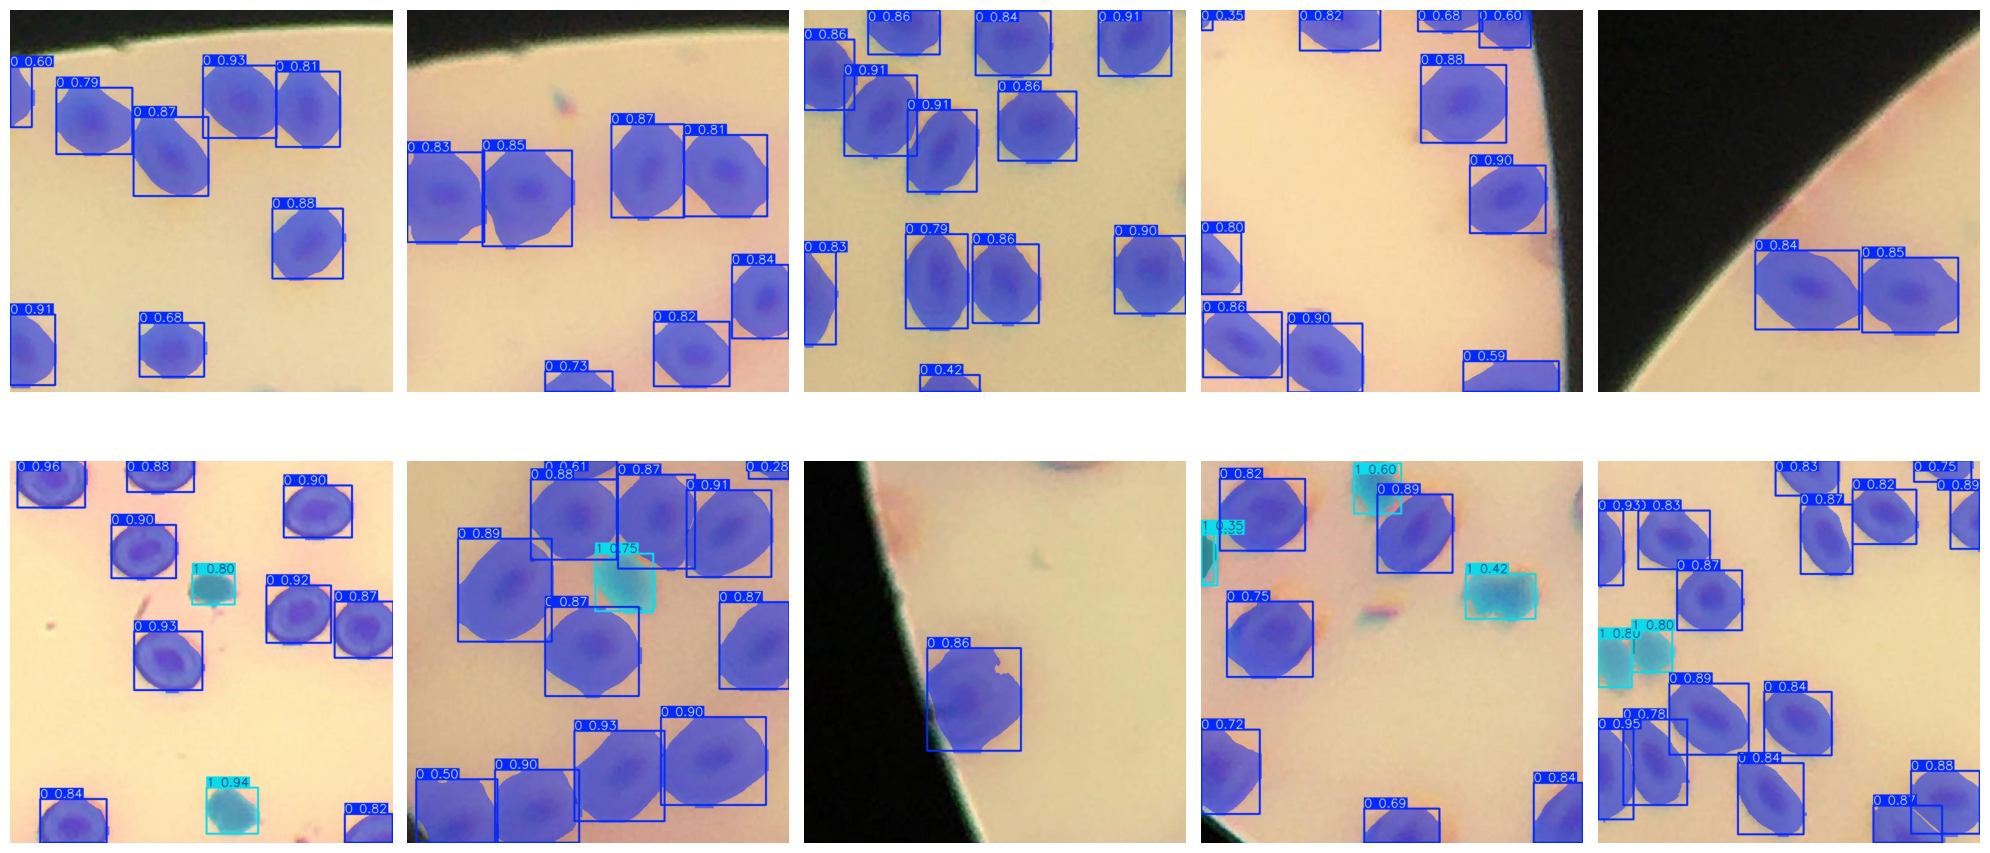

In [ ]:
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

images = glob.glob("/content/runs/segment/predict/*.jpg")
images_to_display = images[:10]

fig, axes = plt.subplots(2, 5, figsize=(20, 10))
for i, ax in enumerate(axes.flat):
    if i < len(images_to_display):
        img = mpimg.imread(images_to_display[i])
        ax.imshow(img)
        ax.axis("off")
    else:
        ax.axis("off")
plt.tight_layout()
plt.show()

Available images: ['/content/cell-1/valid/images/IMG_8866_05_jpg.rf.d1222ab6008a14799682b9a7acfcac80.jpg', '/content/cell-1/valid/images/IMG_8855_05_jpg.rf.747aba13b15865211dff15f4c76dbf3c.jpg', '/content/cell-1/valid/images/IMG_8901_85_jpg.rf.c7f5d10c47d870f54f41a553218db1e4.jpg', '/content/cell-1/valid/images/IMG_8851_50_jpg.rf.258a5a417802520f86715fd4d8f66fda.jpg', '/content/cell-1/valid/images/IMG_8855_12_jpg.rf.abe358c99f045c5448d7f901b2e8bb13.jpg', '/content/cell-1/valid/images/IMG_8806_56_jpg.rf.7c4885d3925f997c6919b3fbe76d33cd.jpg', '/content/cell-1/valid/images/IMG_8855_72_jpg.rf.e3372faa05e24434f78163dc2790f7e4.jpg', '/content/cell-1/valid/images/IMG_8805_61_jpg.rf.aab943760ecd7e7f65e4e66af42860c5.jpg', '/content/cell-1/valid/images/IMG_8806_83_jpg.rf.5b064bf2364934e305396f14a234fcda.jpg', '/content/cell-1/valid/images/IMG_8889_77_jpg.rf.9b8549bb3aadb0978aefab88664f60a5.jpg', '/content/cell-1/valid/images/IMG_8851_83_jpg.rf.60e2b44f5b35967041bc21a50963349c.jpg', '/content/cel

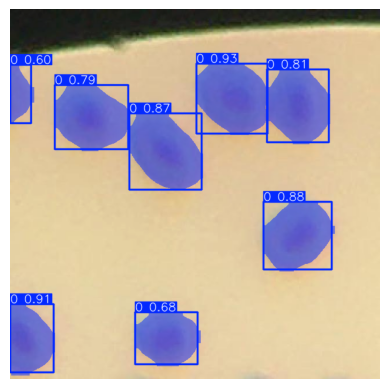

In [ ]:

from collections import Counter
import glob
import matplotlib.pyplot as plt

valid_images = glob.glob(f"{dataset.location}/valid/images/*.jpg")
if not valid_images:
    raise FileNotFoundError("No images found in {dataset.location}/valid/images/")
print("Available images:", valid_images)

sample_image = valid_images[0]
print(f"Using sample image: {sample_image}")

result = model.predict(source=sample_image, imgsz=640, conf=0.25)

annotated_img = result[0].plot()

detections = result[0].boxes.data
class_names = [model.names[int(cls)] for cls in detections[:, 5]]
count = Counter(class_names)

detection_str = ', '.join([f"{name}:{count[name]}" for name in count])
print(detection_str)

plt.imshow(annotated_img[:, :, ::-1])  # Convert BGR to RGB
plt.axis("off")
plt.show()

In [ ]:
print(class_names)

['0', '0', '0', '0', '0', '0', '0', '0']


In [ ]:
!pip install -q gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.2/54.2 MB 18.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.1/323.1 kB 24.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 124.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 5.6 MB/s eta 0:00:00


In [ ]:
import gradio as gr
import cv2
import numpy as np
from collections import Counter

def predict(image):

    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    result = model.predict(source=image_rgb, imgsz=640, conf=0.25)


    annotated_img = result[0].plot()


    detections = result[0].boxes.data
    class_names = [model.names[int(cls)] for cls in detections[:, 5]]
    count = Counter(class_names)


    detection_str = ', '.join([f"{name}:{count[name]}" for name in count])


    annotated_img = annotated_img[:, :, ::-1]

    return annotated_img, detection_str


app = gr.Interface(
    fn=predict,
    inputs=gr.Image(type="numpy", label="Upload an image"),
    outputs=[
        gr.Image(type="numpy", label="Segmented Image"),
        gr.Textbox(label="Detected Counts")
    ],
    title="Blood Cell Instance Segmentation",
    description="Upload an image to perform instance segmentation on blood cells."
)


app.launch()

It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://65f57cd6fc263f9173.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
